In [1]:
#Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from varclushi import VarClusHi
from collections import Counter

In [2]:
#Reading the csv file into a dataframe
loanData = pd.read_csv('/Users/vibhor/Desktop/Models/LC/Loan_status_2007-2020Q3.gzip', index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#Dimensions of the dataframe
loanData.shape

In [ ]:
loanData.info()

In [ ]:
#only when needed, and delete display after it is shown
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [ ]:
#Columns of the dataframe, do
#loanData.columns #too many columns and so all the cols do not get listed this way
list(loanData.columns) #need to print it as a list

In [ ]:
len(loanData.columns[loanData.isna().any()]) # Except the id column all others have N
#to print them
#loanData.columns[loanData.isna().any().tolist()


In [ ]:
#target variable is loan_status. Understand what values it takes and its corresponding counts
loanData['loan_status'].value_counts()

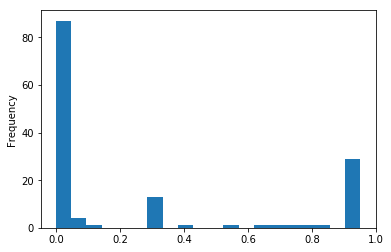

In [3]:
missing_data = loanData.isna().mean() #by variable this returns count(na)/total entries
missing_data.plot.hist(bins=20)

In [4]:
drop_list = list(missing_data[missing_data > 0.2].index)
print("\n\n Drop Features: ", len(drop_list))
drop_list.append('loan_status')
print(drop_list)



 Drop Features:  49
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_a

In [5]:
dropped_data = loanData.loc[:,drop_list] #dataframe of dropped variables. Now checking proportion of loan status where CO (types) NAs are few

In [ ]:
dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()

In [ ]:
loanData['loan_status'].value_counts()

In [ ]:
(loanData['loan_status'].value_counts()[0] + loanData['loan_status'].value_counts()[1]) / loanData['loan_status'].value_counts().sum()

In [ ]:
(dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()[0] + dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts()[1]) / dropped_data[dropped_data['mths_since_last_delinq'].isna()]['loan_status'].value_counts().sum()

In [6]:
newdroplist = drop_list
for var in drop_list:
    if var != 'loan_status':
        temp = (dropped_data[dropped_data[var].isna()]['loan_status'].value_counts()[0] + dropped_data[dropped_data[var].isna()]['loan_status'].value_counts()[1]) / dropped_data[dropped_data[var].isna()]['loan_status'].value_counts().sum()
        if temp > 0.86:
            newdroplist.remove(var)
newdroplist.remove('loan_status')
print(newdroplist)
len(newdroplist)


['mths_since_last_record', 'mths_since_last_major_derog', 'dti_joint', 'open_acc_6m', 'open_il_12m', 'mths_since_rcnt_il', 'il_util', 'open_rv_24m', 'all_util', 'total_cu_tl', 'mths_since_recent_bc_dlq', 'revol_bal_joint', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_chargeoff_within_12_mths', 'hardship_type', 'hardship_status', 'hardship_amount', 'hardship_end_date', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount']


24

In [7]:
df_refined = loanData.drop(newdroplist, axis = 1, inplace = False)
df_refined.shape


In [ ]:
#tried to drop rows with NAs but only 1 column has 2 NAs
#droprow_df = loanData.dropna(axis=0, how='any', thresh = 2)
#droprow_df.shape

In [8]:
#counting number of object type (categorical) and numeric and getting a list of those
Counter(df_refined.dtypes)
num_cols = df_refined._get_numeric_data().columns
cat_cols = list(set(df_refined.columns) - set(num_cols))

In [42]:
df_num = df_refined.loc[:,num_cols]

In [10]:
num_cols[0]

'loan_amnt'

In [43]:
#new flag
not_problematic = ['Current','Fully Paid']
df_num['statusFlag'] = [0 if x in not_problematic else 1 for x in loanData['loan_status']]

In [26]:
#understand what is wrong wit this
list_replace = [replaceVal_flag0,replaceVal_flag1]
df_num['loan_amnt'] = df_num.apply(
    lambda list_replace: df_num[df_num['statusFlag']==0]['loan_amnt'].fillna(list_replace[0]) if df_num['statusFlag']==0 
    else df_num[df_num['statusFlag']==1]['loan_amnt'].fillna(list_replace[1])
)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index loan_amnt')

In [32]:
#takes about 15 mins
for var in num_cols:
    if var != 'statusFlag':
        replaceVal_flag0 = df_num[df_num['statusFlag']==0][var].mean()
        replaceVal_flag1 = df_num[df_num['statusFlag']==1][var].mean()

        df_num[df_num['statusFlag']==1][var].fillna(replaceVal_flag1, inplace = True)
        df_num[df_num['statusFlag']==0][var].fillna(replaceVal_flag0, inplace = True)


# #Clustering

In [48]:
replaceVal_flag0 = df_num[df_num['statusFlag']==0]['annual_inc'].mean()
replaceVal_flag1 = df_num[df_num['statusFlag']==1]['annual_inc'].mean()
df_num[df_num['statusFlag']==1]['annual_inc'].fillna(replaceVal_flag1, inplace = True)
df_num[df_num['statusFlag']==0]['annual_inc'].fillna(replaceVal_flag0, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [49]:
df_num['annual_inc'].isna().any()

True

In [44]:
df_num['statusFlag'].value_counts()

0    2528799
1     396694
Name: statusFlag, dtype: int64

In [45]:
len(df_num['annual_inc'])

2925493

In [47]:
2528799 + 396694

2925493

In [33]:
df_Y = df_num.pop('statusFlag')

In [34]:
df_num_short = df_num.sample(frac = 0.3)

In [35]:
loanData_vc = VarClusHi(df_num_short,maxclus=None)

In [36]:
loanData_vc.varclus()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [39]:
loanData_vc.corrs

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,total_il_high_credit_limit,sec_app_fico_range_low,sec_app_mort_acc,sec_app_revol_util,sec_app_num_rev_accts,sec_app_collections_12_mths_ex_med,deferral_term,hardship_dpd,orig_projected_additional_accrued_interest,hardship_last_payment_amount
loan_amnt,1.000000,0.999832,0.999314,0.943603,NaN,NaN,NaN,0.112787,0.112787,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.999832,1.000000,0.999528,0.943836,NaN,NaN,NaN,0.112516,0.112516,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.999314,0.999528,1.000000,0.943208,NaN,NaN,NaN,0.112327,0.112327,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.943603,0.943836,0.943208,1.000000,NaN,NaN,NaN,0.052137,0.052137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico_range_low,0.112787,0.112516,0.112327,0.052137,NaN,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico_range_high,0.112787,0.112516,0.112327,0.052137,NaN,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
loanData_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,loan_amnt,NaN,0,NaN
1,0,funded_amnt,NaN,0,NaN
2,0,funded_amnt_inv,NaN,0,NaN
3,0,installment,NaN,0,NaN
4,0,annual_inc,NaN,0,NaN
5,0,dti,NaN,0,NaN
6,0,delinq_2yrs,NaN,0,NaN
7,0,fico_range_low,NaN,0,NaN
8,0,fico_range_high,NaN,0,NaN
9,0,inq_last_6mths,NaN,0,NaN


In [ ]:
#loanData_vc.info

In [ ]:
not_problematic = ['Current','Fully Paid']
loanData['statusFlag'] = [0 if x in not_problematic else 1 for x in loanData['loan_status']]

In [ ]:
loanData['statusFlag'].value_counts()

#determining cat and num vars
#removing vars that have too many NAs
#clustering
#RF for var select
#IV and WOE


In [ ]:
df_dropped = pd.concat([dropped_data, df_Y], axis=1)